In [52]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [36]:
# Load Data from pickle file
myFile = open('Comparison_Opt_May_25.p', 'rb')
results = pkl.load(myFile)
myFile.close()

In [37]:
Evals = results["Evals"]

In [38]:
# average over trials
Averaged_Evals = np.mean(Evals, axis=2)

In [39]:
print(Averaged_Evals)

[[3.2900e+02 3.1100e+02 2.5500e+02 1.8800e+02 2.0400e+02 5.0000e+03
  5.0000e+03 5.0000e+03 4.7000e+02 5.0000e+03 5.0000e+03 4.2800e+02
  5.0000e+03 3.6100e+03 5.0000e+03 1.9910e+03 2.0000e+00 9.2000e+01
  5.0000e+03 5.0000e+03 5.0000e+03 6.4000e+01]
 [5.0000e+03 5.0000e+03 5.0000e+03 5.0000e+03 2.8370e+03 5.0000e+03
  5.0000e+03 5.0000e+03 5.0000e+03 5.0000e+03 5.0000e+03 5.0000e+03
  5.0000e+03 5.0000e+03 5.0000e+03 5.0000e+03 2.0000e+00 1.0800e+02
  1.1700e+02 5.0000e+03 5.0000e+03 3.2500e+02]
 [5.1500e+02 4.9500e+02 5.2500e+02 3.6500e+02 4.9000e+02 5.0000e+03
  5.0000e+03 5.0000e+03 7.0000e+02 5.0000e+03 5.0000e+03 7.2500e+02
  5.0000e+03 5.0000e+03 5.0000e+03 4.0600e+03 1.0000e+01 8.0000e+01
  5.0000e+03 5.0000e+03 5.0000e+03 2.3000e+02]
 [3.8260e+03 3.1735e+03 3.0610e+03 2.1385e+03 1.5535e+03 5.0410e+03
  5.0410e+03 5.0410e+03 4.1860e+03 5.0410e+03 5.0410e+03 4.5235e+03
  5.0410e+03 5.0410e+03 5.0410e+03 5.0410e+03 1.0000e+00 2.7910e+03
  5.0410e+03 5.0410e+03 5.0410e+03 4.7350e+

In [40]:
min_Evals = np.min(Averaged_Evals,axis=0)

In [41]:
normalized_Evals = Averaged_Evals/min_Evals
print(normalized_Evals)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          2.          1.15
  42.73504274  1.          1.          1.        ]
 [15.19756839 16.07717042 19.60784314 26.59574468 13.90686275  1.
   1.          1.         10.63829787  1.          1.         11.68224299
   1.          1.38504155  1.          2.51130085  2.          1.35
   1.          1.          1.          5.078125  ]
 [ 1.56534954  1.59163987  2.05882353  1.94148936  2.40196078  1.
   1.          1.          1.4893617   1.          1.          1.69392523
   1.          1.38504155  1.          2.03917629 10.          1.
  42.73504274  1.          1.          3.59375   ]
 [11.62917933 10.20418006 12.00392157 11.375       7.61519608  1.0082
   1.0082      1.0082      8.90638298  1.0082      1.0082     10.56892523
   1.0082      1.39639889  1.0082      2.53189352  1.         34.8875
  43.08547009  1.00

In [45]:
tau_vals = np.exp2(np.arange(0,12,0.01))
num_tau_vals = len(tau_vals)

In [50]:
NumProbs = normalized_Evals.shape[1]
rho_vals = np.zeros((4,num_tau_vals))

for j in range(num_tau_vals):
    for i in range(4):
        rho_vals[i,j] = np.count_nonzero(normalized_Evals[i,:]<=tau_vals[j])/NumProbs

print(rho_vals)

[[0.86363636 0.86363636 0.86363636 ... 1.         1.         1.        ]
 [0.45454545 0.45454545 0.45454545 ... 1.         1.         1.        ]
 [0.45454545 0.45454545 0.45454545 ... 1.         1.         1.        ]
 [0.04545455 0.04545455 0.45454545 ... 1.         1.         1.        ]]


In [49]:
print(NumProbs)

22


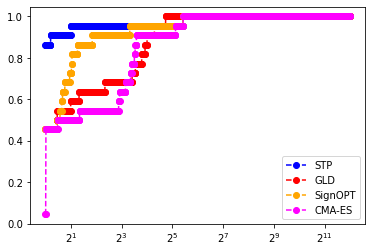

In [58]:
# Plotting

plt.semilogx(tau_vals, rho_vals[0,:], label="STP",
             color = 'blue', linestyle= '--', marker = 'o', base=2)
plt.semilogx(tau_vals, rho_vals[1,:], label="GLD",
             color = 'red', linestyle= '--', marker = 'o', base=2)
plt.semilogx(tau_vals, rho_vals[2,:], label="SignOPT",
             color = 'orange', linestyle= '--', marker = 'o', base=2)
plt.semilogx(tau_vals, rho_vals[3,:], label="CMA-ES",
             color = 'magenta', linestyle= '--', marker = 'o', base=2)
plt.legend()
plt.show()

